# Estimation Theory Mini Project 3


In [1]:
from pylab import *

In [2]:
from scipy.stats import beta
import scipy.optimize

In [3]:
from tqdm import tqdm_notebook

In [4]:
rcParams['figure.figsize'] = 12,9
rcParams['axes.grid'] = True
rcParams['font.size'] = 18
rcParams['figure.facecolor'] = 'w'

In [5]:
pi=0.9
p=0.9
q=0.1
m=10
n=100

In [6]:
def getXZ(pi, p, q, m=10, n=100):
    # A=0, B=1; H=1, T=0
    pq = array([p, q])
    z = (rand(n)>pi).astype('int')
    x = rand(n, m)
    x = (x<pq[z].reshape(-1, 1)).astype('int')
    return x, z

In [7]:
getXZ(pi, p , q, n = 20)

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1]]),
 array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

# Experiment 1

In [8]:
def update_em(x, theta, n, m, pi):
    p_a = zeros(n)
    p_b = zeros(n)
    h = zeros(n)
    for i in range(n):        
        h[i] = count_nonzero(x[i])
        p_a[i] = (pi*(theta[0]**h[i])*((1-theta[0])**(m-h[i])))/(pi*(theta[0]**h[i])*((1-theta[0])**(m-h[i])) + (1-pi)*(theta[1]**h[i])*((1-theta[1])**(m-h[i])))
        p_b[i] = 1-p_a[i]
    theta_new = [np.dot(h,p_a)/np.dot(m*ones(n),p_a), np.dot(h,p_b)/np.dot(m*ones(n),p_b)]
    return array(theta_new)

In [9]:
def EM(x, theta_0, update_fn, maxiter=3000, debug=False, **kwargs):
    n, m = x.shape
    theta_all = [theta_0]
    theta_all.append(update_fn(x, theta_0, n, m, **kwargs))
    err = 1
    i=0
    while err>1e-6 and i<maxiter:
        theta_all.append(update_fn(x, theta_all[-1], n, m, **kwargs))
        err = abs(theta_all[-1] - theta_all[-2]).max()
        if debug:
            print(err)
        i+=1
    return array(theta_all)

In [10]:
COLORS = ['blue', 'red', 'green']

In [11]:
pipq1 = 0.5, 0.35, 0.6
pipq2 = 0.25, 0.35, 0.6
ms = [1, 10]
ns = [10, 1000, 10000]

In [12]:
def problem1(pi, p, q, pi_known):
    print(f"pi={pi}, p={p}, q={q}")
    print(f"EM done assuming pi={pi_known}")
    ms = [1, 10]
    ns = [10, 1000, 10000]
    alps = linspace(0, 1, len(ns)+1)[1:]
    print(alps)
    for m in ms:
        figure()
        xlabel("Steps")
        ylabel("Parameter")
        title(f"m={m}")
        axhline(p, ls='--', color='blue', label='$p*$')
        axhline(q, ls='--', color='red', label='$q*$')
        for i, n in enumerate(ns):
            x, z = getXZ(pi, p, q, m, n)
            theta_0 = [0.45, 0.5]
            theta_all = EM(x, theta_0, update_em, pi=pi_known)
            plot(theta_all[:, 0], label=f"n={n}", color='blue', alpha=alps[i])
            plot(theta_all[:, 1], color='red', alpha=alps[i])
        legend()

pi=0.5, p=0.35, q=0.6
EM done assuming pi=0.5
[0.33333333 0.66666667 1.        ]


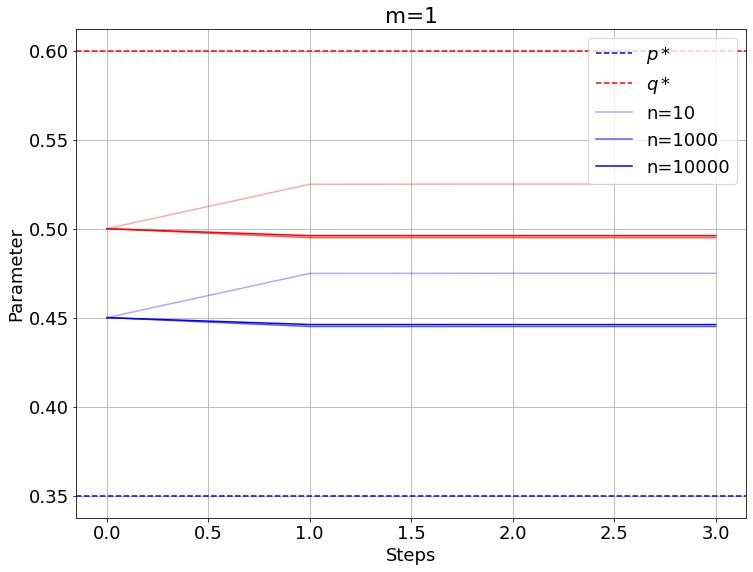

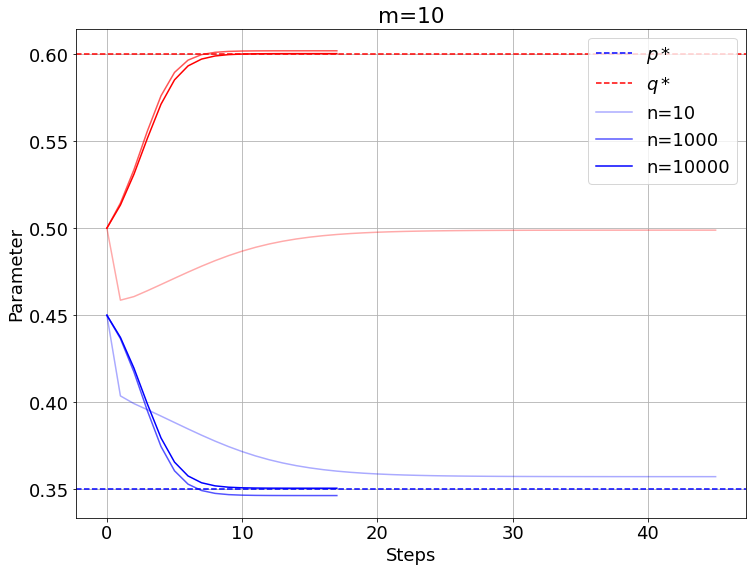

In [13]:
problem1(*pipq1, 0.5)

pi=0.25, p=0.35, q=0.6
EM done assuming pi=0.5
[0.33333333 0.66666667 1.        ]


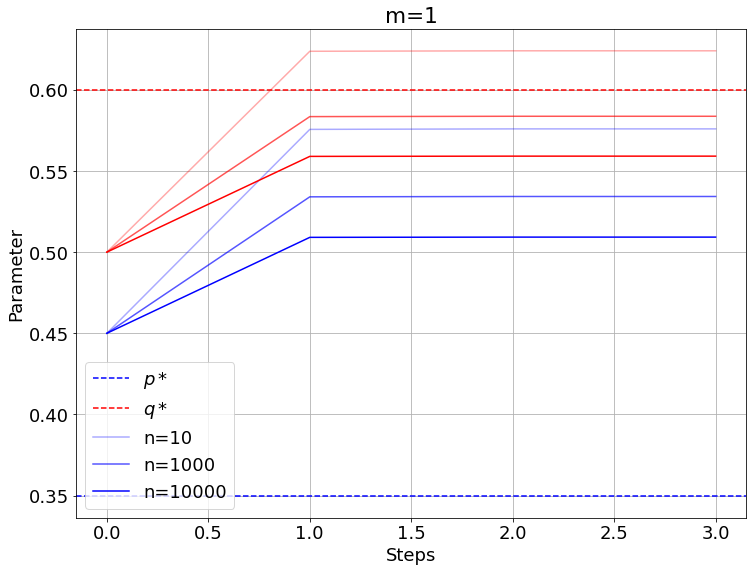

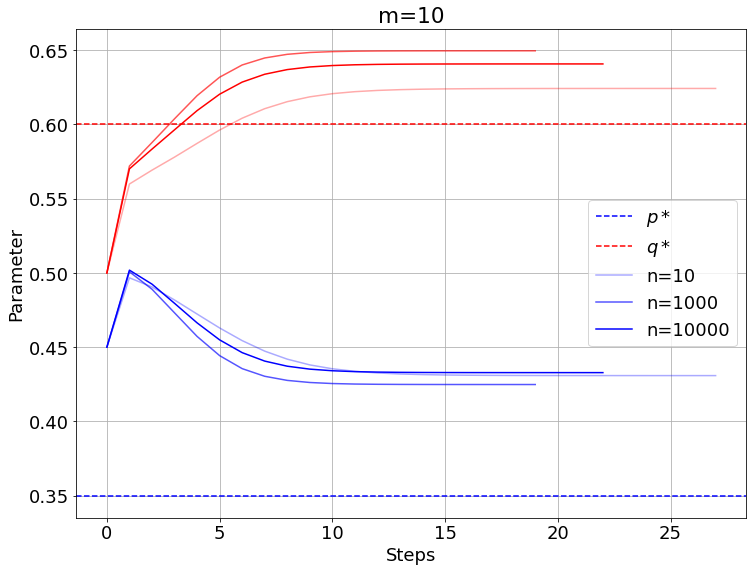

In [14]:
problem1(*pipq2, 0.5)

With wrong assumed $\pi$, true parameters are not recovered

pi=0.25, p=0.35, q=0.6
EM done assuming pi=0.25
[0.33333333 0.66666667 1.        ]


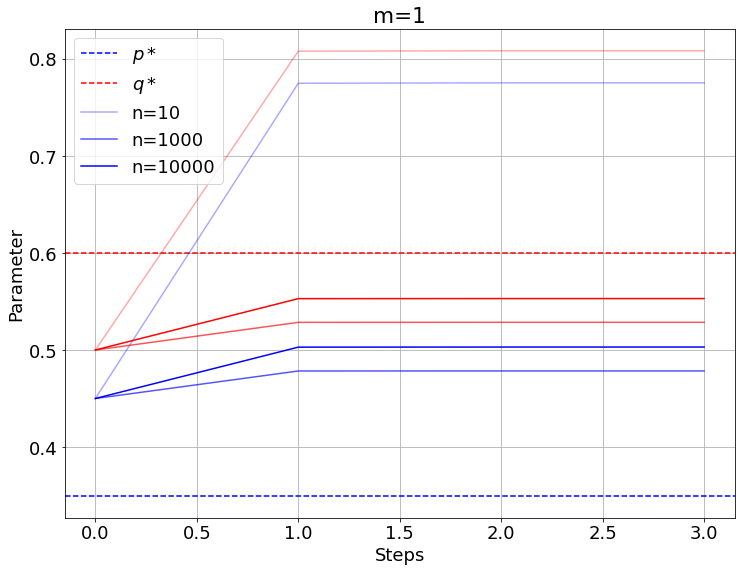

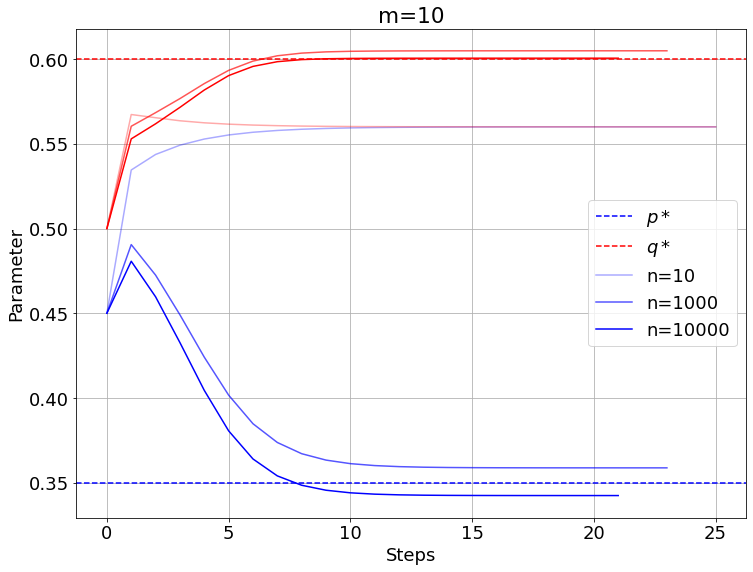

In [15]:
problem1(*pipq2, 0.25)

Parameters are successfully recovered when assumed value of $\pi$ is correct

# Experiment 2

In [16]:
def update_em2(x, theta, n, m):
    pi, p, q = theta
    heads = count_nonzero(x, axis=-1)
    A = (p**heads)*(1-p)**(m-heads)
    B = (q**heads)*(1-q)**(m-heads)
    Ez = (1-pi)*B/(pi*A + (1-pi)*B)
    prob = heads/m
    new_pi = 1-Ez.mean()
    new_q = (prob*Ez).sum()/Ez.sum()
    new_p = (prob*(1-Ez)).sum()/(1-Ez).sum()
    theta_new = [new_pi, new_p, new_q]
    return array(theta_new)

In [17]:
theta0 = array([0.5, 0.45, 0.5])
x,z = getXZ(*pipq2, m=100, n=10000)
EM(x, theta0, update_em2)
# theta = theta0

array([[0.5       , 0.45      , 0.5       ],
       [0.30629527, 0.4003125 , 0.59571624],
       [0.26835331, 0.35749875, 0.60128616],
       [0.25688544, 0.35123324, 0.5996899 ],
       [0.25512365, 0.35039426, 0.5993896 ],
       [0.25487354, 0.35027877, 0.59934552],
       [0.25483852, 0.35026268, 0.59933932],
       [0.25483363, 0.35026044, 0.59933846],
       [0.25483295, 0.35026013, 0.59933833]])

In [18]:
def problem2(pi, p, q, theta0):
    print(f"pi={pi}, p={p}, q={q}")
    ms = [1, 10, 100]
    ns = [10, 1000, 10000]
    alps = linspace(0, 1, len(ns)+1)[1:]
    for m in ms:
        figure()
        xlabel("Steps")
        ylabel("Parameter")
        title(f"m={m}")
        axhline(pi, ls='--', color='green', label='$\pi*$')
        axhline(p, ls='--', color='blue', label='$p*$')
        axhline(q, ls='--', color='red', label='$q*$')
        for i, n in enumerate(ns):
            x, z = getXZ(pi, p, q, m, n)
            theta_all = EM(x, theta0, update_em2)
            plot(theta_all[:, 0], label=f"n={n}", color='green', alpha=alps[i])
            plot(theta_all[:, 1], color='blue', alpha=alps[i])
            plot(theta_all[:, 2], color='red', alpha=alps[i])
            print(f"done m={m}, n={n}")
        legend()

pi=0.25, p=0.35, q=0.6
done m=1, n=10
done m=1, n=1000
done m=1, n=10000
done m=10, n=10
done m=10, n=1000
done m=10, n=10000
done m=100, n=10
done m=100, n=1000
done m=100, n=10000


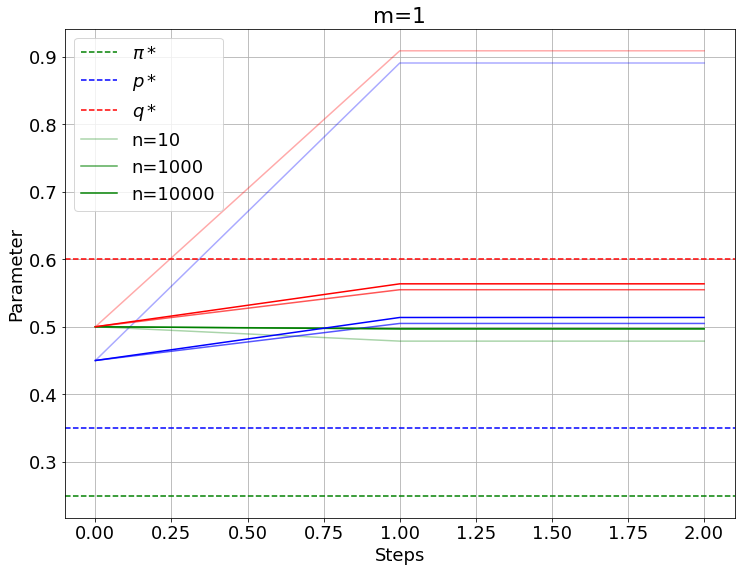

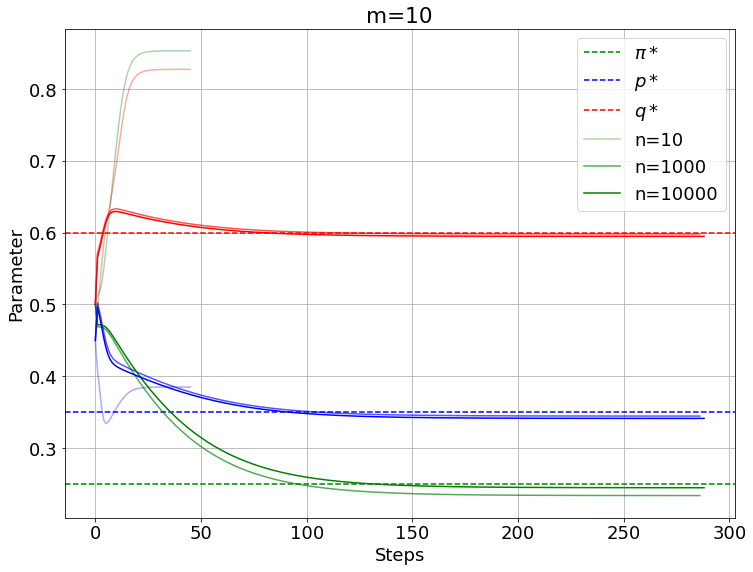

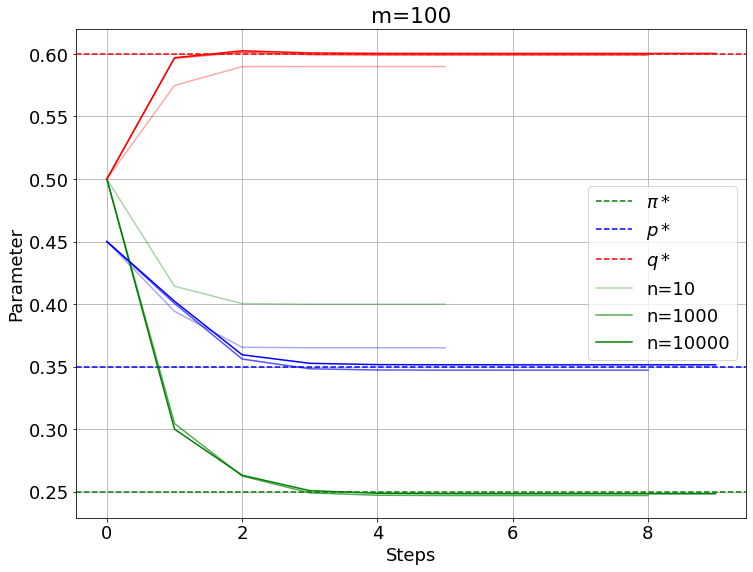

In [19]:
problem2(*pipq2, [0.5, 0.45, 0.5])

Correct parameters recovered

pi=0.25, p=0.35, q=0.6
done m=1, n=10
done m=1, n=1000
done m=1, n=10000
done m=10, n=10
done m=10, n=1000
done m=10, n=10000
done m=100, n=10
done m=100, n=1000
done m=100, n=10000


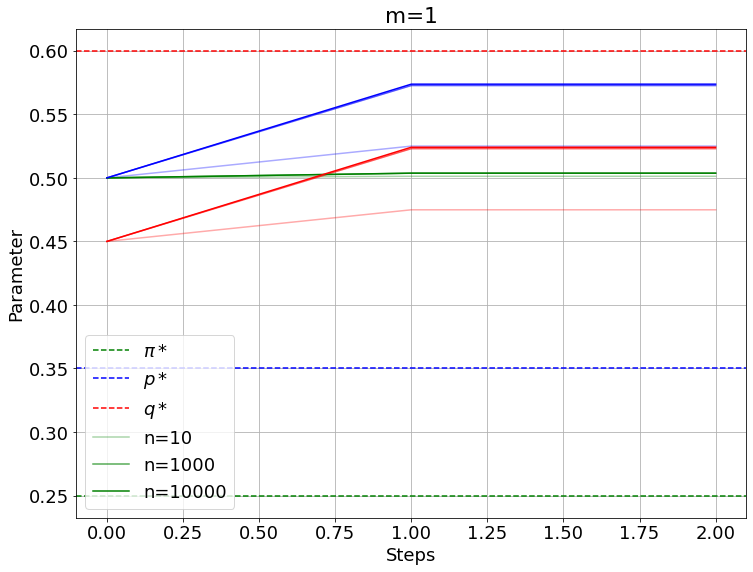

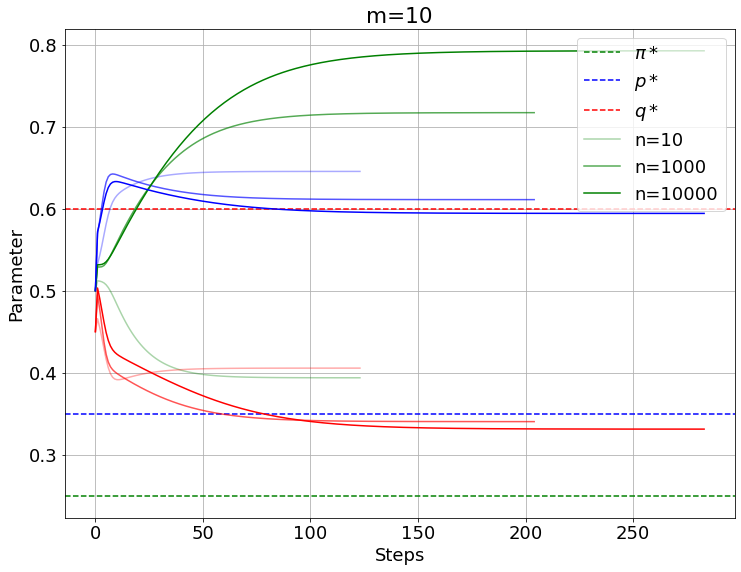

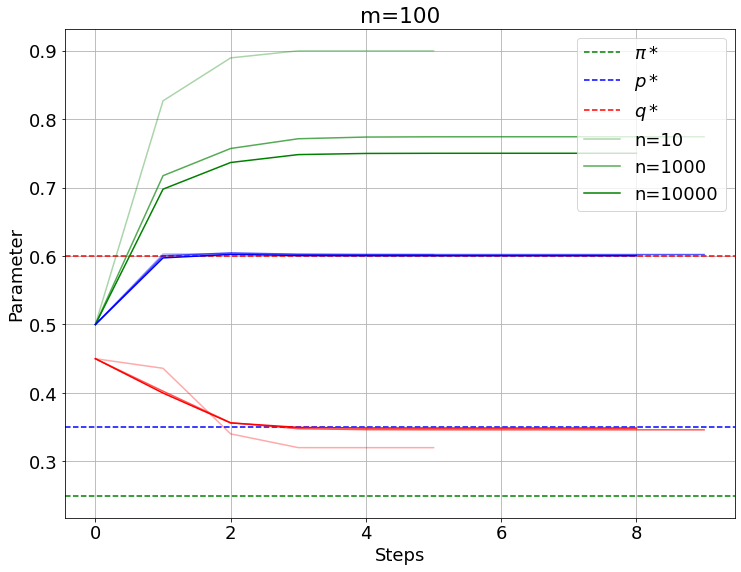

In [20]:
problem2(*pipq2, [0.5, 0.5, 0.45])

$p$ and $q$ are swapped, and we recover $1-\pi$ instead of $\pi$

In [21]:
def update_em3(x,theta,n,m,prior=[1,1]) :
    pi, p, q = theta
    a,b = prior
    heads = count_nonzero(x, axis=-1)
    A = (p**heads)*(1-p)**(m-heads)
    B = (q**heads)*(1-q)**(m-heads)
    Ez = (1-pi)*B/(pi*A + (1-pi)*B)
    prob = heads/m
    new_pi = (a-1+(1-Ez).sum())/(n+a+b-2)
    new_q = (prob*Ez).sum()/Ez.sum()
    new_p = (prob*(1-Ez)).sum()/(1-Ez).sum()
    theta_new = [new_pi, new_p, new_q]
    return array(theta_new)

In [22]:
def problem3(pi, p, q, theta0, prior=[1, 1]):
    print(f"pi={pi}, p={p}, q={q}")
#     ms = [1, 10, 100]
    ms = [10]
    ns = [10, 1000, 10000]
    alps = linspace(0, 1, len(ns)+1)[1:]
    for m in ms:
        figure()
        xlabel("Steps")
        ylabel("Parameter")
        title(f"m={m}")
        axhline(pi, ls='--', color='green', label='$\pi*$')
        axhline(p, ls='--', color='blue', label='$p*$')
        axhline(q, ls='--', color='red', label='$q*$')
        for i, n in enumerate(ns):
            x, z = getXZ(pi, p, q, m, n)
            theta_all = EM(x, theta0, update_em3, prior=prior)
            plot(theta_all[:, 0], label=f"n={n}", color='green', alpha=alps[i])
            plot(theta_all[:, 1], color='blue', alpha=alps[i])
            plot(theta_all[:, 2], color='red', alpha=alps[i])
            print(f"done m={m}, n={n}")
        legend()

prior = [1, 1]
0.5
pi=0.25, p=0.35, q=0.6
done m=10, n=10
done m=10, n=1000
done m=10, n=10000
prior = [1, 3]
0.5
pi=0.25, p=0.35, q=0.6
done m=10, n=10
done m=10, n=1000
done m=10, n=10000
prior = [2, 6]
0.16666666666666666
pi=0.25, p=0.35, q=0.6
done m=10, n=10
done m=10, n=1000
done m=10, n=10000
prior = [3, 9]
0.2
pi=0.25, p=0.35, q=0.6
done m=10, n=10
done m=10, n=1000
done m=10, n=10000


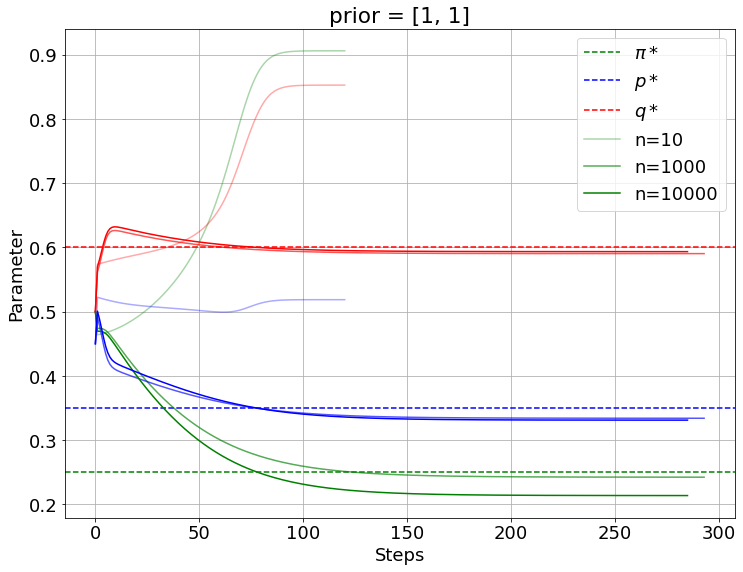

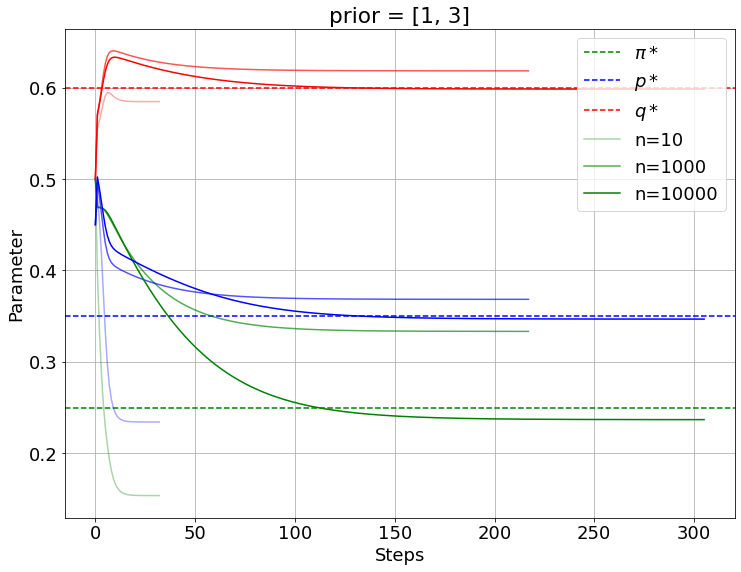

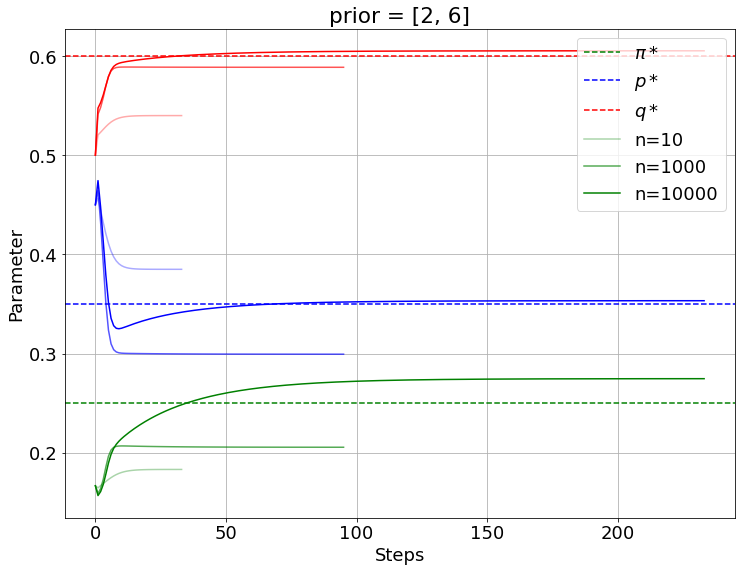

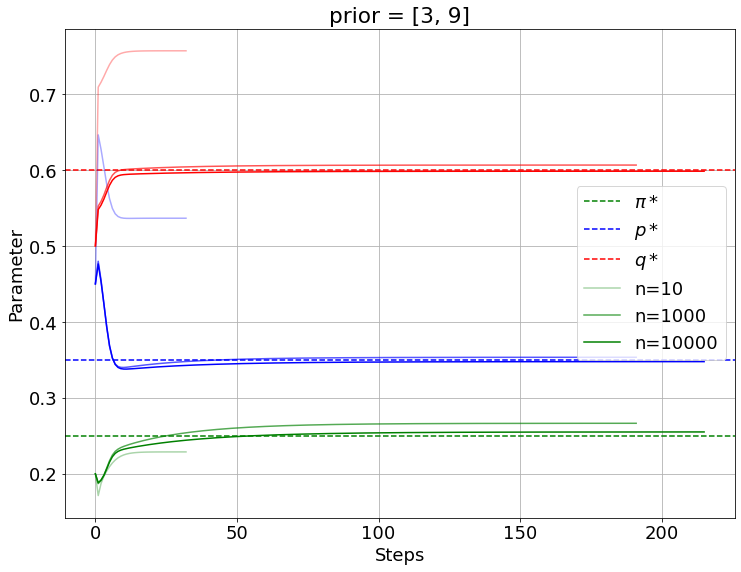

In [28]:
priors = [[1,1], [1,3], [2,6], [3, 9]]
for prior in priors:
    print(f"prior = {prior}")
    a, b = prior
    mode = 0.5 if a==1 else (a-1)/(a+b-2) 
    print(mode)
    problem3(*pipq2, [mode, 0.45, 0.5], prior=prior)
    title(f"prior = {prior}")

Fewer iterations are needed to converge compared to experiment 2 because of the prior

---